In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import platform
from matplotlib import font_manager, rc # Runtime Configuration

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
os.listdir('전처리/의료기관/')

['경상남도_의료기관_300병상_이상.csv',
 '년도별_병원수.csv',
 '년도별정리.csv',
 '의료기관.csv',
 '의료기관_법정동_행정동 - 복사본.csv',
 '의료기관_법정동_행정동.csv',
 '의료기관_영업중.csv',
 '의료기관_영업중_법정동_행정동.csv',
 '의료기관_영업중_진료과.csv',
 '의료기관_영업중_진료과_병합.csv',
 '의료기관_폐업.csv',
 '의료기관_폐업_법정동_행정동.csv',
 '인구50만이상',
 '진료과목']

In [4]:
의료기관 = pd.read_csv('./전처리/의료기관/의료기관_영업중_진료과.csv', encoding='cp949')

In [5]:
의료기관.reset_index(drop=True, inplace=True)

In [6]:
의료기관.loc[0]

개방서비스명                             병원
개방서비스아이디                   01_01_01_P
개방자치단체코드                      5350000
관리번호        PHMA219975350029021200001
인허가일자                      19970401.0
                      ...            
결핵과                                 0
예방의학과                               0
보건진료소                               0
보건지소                                0
보건소                                 0
Name: 0, Length: 92, dtype: object

In [7]:
의료기관.columns

Index(['개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)',
       '의료기관종별명', '의료인수', '입원실수', '병상수', '총면적', '진료과목내용', '진료과목내용명', '지정취소일자',
       '완화의료지정형태', '완화의료담당부서명', '구급차특수', '구급차일반', '총인원', '구조사수', '허가병상수',
       '최초지정일자', '한방내과', '한방부인과', '한방소아과', '한방안·이비인후·피부과', '한방신경정신과', '침구과',
       '한방재활의학과', '사상체질과', '한방응급과', '내과', '가정의학과', '정형외과', '마취통증의학과',
       '진단검사의학과', '재활의학과', '구강악안면외과', '소아치과', '구강내과', '예방치과', '치과', '치과보철과',
       '치과교정과', '치주과', '치과보존과', '영상치의학과', '구강병리과', '구강악안면방사선과', '통합치의학과',
       '신경과', '외과', '신경외과', '산부인과', '소아청소년과', '이비인후과', '비뇨의학과', '영상의학과',
       '응급의학과', '직업환경의학과', '정신건강의학과', '피부과', '흉부외과', '성형외과', '안과', '병리과',
       '결핵과', '예방의학과', '보건진료소', '보건지소', '보건소'],
      dtype='object')

In [8]:
의료기관.value_counts('업태구분명')

업태구분명
의원              238
치과의원            137
한의원             108
요양병원(일반요양병원)     31
병원               22
보건지소              8
종합병원              5
치과병원              5
요양병원(정신병원)        4
한방병원              4
보건소               1
보건진료소             1
dtype: int64

In [9]:
for n in range(len(의료기관)):
    if 의료기관['업태구분명'][n] == '요양병원(일반요양병원)':
        의료기관['업태구분명'][n] = '요양병원'
        
    elif 의료기관['업태구분명'][n] == '요양병원(정신병원)':
        의료기관['업태구분명'][n] = '정신병원'
    

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19460\370946786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의료기관['업태구분명'][n] = '요양병원'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19460\370946786.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의료기관['업태구분명'][n] = '정신병원'


In [10]:
의료기관.value_counts('업태구분명')

업태구분명
의원       238
치과의원     137
한의원      108
요양병원      31
병원        22
보건지소       8
종합병원       5
치과병원       5
정신병원       4
한방병원       4
보건소        1
보건진료소      1
dtype: int64

In [11]:
병원급 = {'의원급' : 238+137+108, '병원급':30+22+5+4+4, '종합병원급':5, '상급종합병원급' : 0}

In [12]:
병원급

{'의원급': 483, '병원급': 65, '종합병원급': 5, '상급종합병원급': 0}

In [13]:
병원급분류 = pd.Series(병원급)

In [14]:
병원급분류

의원급        483
병원급         65
종합병원급        5
상급종합병원급      0
dtype: int64

In [15]:
병원급분류.values

array([483,  65,   5,   0], dtype=int64)

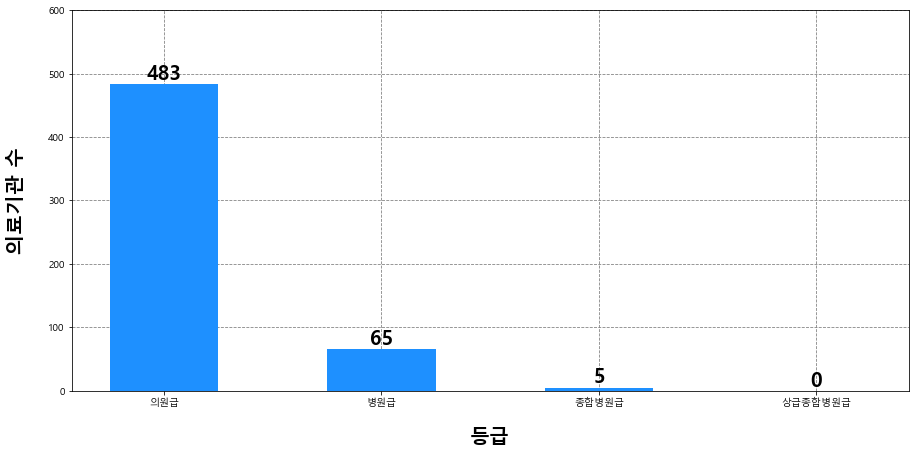

In [16]:
f, ax = plt.subplots(figsize=(15, 7), facecolor='w')
plt.rc('font', size=20)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
# plt.grid(True)


x = 병원급분류.index[:]
y = 병원급분류.values[:]

bar = plt.bar(x, y, color='dodgerblue',  width=0.5)


for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height-0.5, '%.0f' % height, 
             ha='center', va='bottom', size = 20,fontweight = 'bold')

plt.ylim([0, 600])

# plt.title('의료기관 등급 현황', size=25, pad=20, fontweight = 'bold')
plt.xlabel('등급', labelpad=20, size=20, weight ='bold')
plt.ylabel('의료기관 수', labelpad=20, size=20, weight ='bold')

plt.show()

In [17]:
병원급분류.index[:3]

Index(['의원급', '병원급', '종합병원급'], dtype='object')

In [18]:
병원급분류.values[:3]

array([483,  65,   5], dtype=int64)

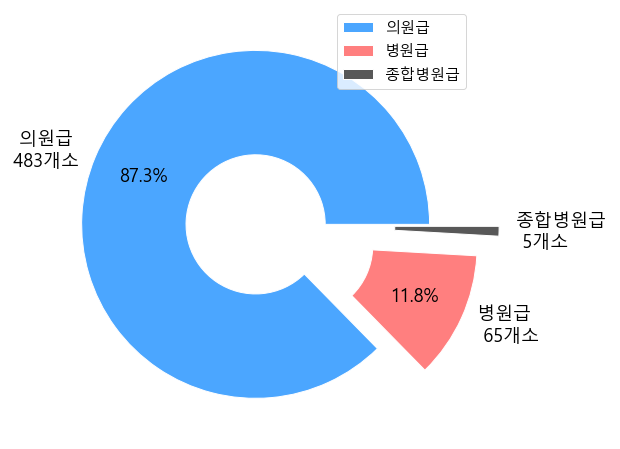

In [19]:
def customPct(pct) :
    return ('%.1f%%' % pct) if pct >= 1 else ''


f, ax = plt.subplots(figsize=(8, 8), facecolor='w')
plt.rc('font', size=15)


x = 병원급분류.index[:3]
y = 병원급분류.values[:3]


title_font = {
    'fontsize': 25,
    'fontweight': 'bold'
}

# plt.title('2022년 경남 의료기관 비율',  fontdict=title_font)


labels = ['의원급 \n 483개소', '병원급 \n 65개소', '종합병원급 \n 5개소']

wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'w'}
plt.pie(y, 
        labels = labels, 
        autopct=customPct,
        explode=[0, 0.3, 0.4],
        wedgeprops = wedgeprops, 
        pctdistance=0.7,
        textprops={'size': 18},
        colors = ['#4ba6ff',  '#ff7f7f', '#585858'])


plt.legend(list(x))

#plt.legend(loc = (1, 0.5))
plt.show()

In [20]:
진료과_list = ['한방내과', '한방부인과', '한방소아과', '한방안·이비인후·피부과', '한방신경정신과', '침구과',
       '한방재활의학과', '사상체질과', '한방응급과', '내과', '가정의학과', '정형외과', '마취통증의학과',
       '진단검사의학과', '재활의학과', '구강악안면외과', '소아치과', '구강내과', '예방치과', '치과', '치과보철과',
       '치과교정과', '치주과', '치과보존과', '영상치의학과', '구강병리과', '구강악안면방사선과', '통합치의학과',
       '신경과', '외과', '신경외과', '산부인과', '소아청소년과', '이비인후과', '비뇨의학과', '영상의학과',
       '응급의학과', '직업환경의학과', '정신건강의학과', '피부과', '흉부외과', '성형외과', '안과', '병리과',
       '결핵과', '예방의학과']

In [21]:
len(진료과_list)

46

In [22]:
의료기관[의료기관['구강내과']==1]['사업장명']

0      의료법인보원의료재단 경희대학교 교육협력 중앙병원
47         자기치아살리기365일야간드림플란트치과병원
49                         뉴욕치과병원
67                       삼계뉴욕치과병원
80                       부원뉴욕치과병원
                  ...            
465                        세정치과의원
466                        명신치과의원
467                       율하수치과의원
468                      치아사랑치과의원
469                      청플란트치과의원
Name: 사업장명, Length: 141, dtype: object

In [23]:
a = os.listdir('원본 DATA/건강보험심사평가원_전국 병의원 및 약국 현황_20220630')
a

['1.병원정보서비스 2022.6.xlsx',
 '10. 의료기관별상세정보서비스 08특수진료정보 2022.6.xlsx',
 '11. 의료기관별상세정보서비스 09전문병원지정분야 2022.6.xlsx',
 '2. 약국정보서비스 2022.6.xlsx',
 '3. 의료기관별상세정보서비스 01시설정보 2022.6.xlsx',
 '4. 의료기관별상세정보서비스 02세부정보 2022.6.xlsx',
 '5. 의료기관별상세정보서비스 03진료과목정보 2022.6.xlsx',
 '6. 의료기관별상세정보서비스 04교통정보 2022.6.xlsx',
 '7. 의료기관별상세정보서비스 05의료장비정보 2022.6.xlsx',
 '8. 의료기관별상세정보서비스 06식대가산정보 2022.6.xlsx',
 '9. 의료기관별상세정보서비스 07간호등급정보 2022.6.xlsx']

In [24]:
전국병원 = pd.read_excel('원본 DATA/건강보험심사평가원_전국 병의원 및 약국 현황_20220630/' + a[0])

In [25]:
전국병원.head(1)

암호화요양기호   요양기관명  종별코드 종별코드명  \
0  JDQ4MTYyMiM1MSMkMSMkNCMkOTIkMzgxOTYxIzExIyQxIy...  강동보건지소    72  보건지소   

     시도코드 시도코드명   시군구코드 시군구코드명  읍면동     우편번호  ... 치과일반의 인원수 치과인턴 인원수  \
0  320000    강원  320100    강릉시  NaN  25620.0  ...         0        0   

  치과레지던트 인원수 치과전문의 인원수  한방일반의 인원수  한방인턴 인원수  한방레지던트 인원수  한방전문의 인원수  \
0          0         0          1         0           0          0   

          x좌표        y좌표  
0  128.954213  37.728086  

[1 rows x 29 columns]

In [26]:
전국병원.columns

Index(['암호화요양기호', '요양기관명', '종별코드', '종별코드명', '시도코드', '시도코드명', '시군구코드', '시군구코드명',
       '읍면동', '우편번호', '주소', '전화번호', '병원홈페이지(URL)', '개설일자', '총의사수', '의과일반의 인원수',
       '의과인턴 인원수', '의과레지던트 인원수', '의과전문의 인원수', '치과일반의 인원수', '치과인턴 인원수',
       '치과레지던트 인원수', '치과전문의 인원수', '한방일반의 인원수', '한방인턴 인원수', '한방레지던트 인원수',
       '한방전문의 인원수', 'x좌표', 'y좌표'],
      dtype='object')

In [27]:
전국병원요약 = 전국병원[['요양기관명', '종별코드명', '시도코드명','시군구코드명']]
전국병원요약

요양기관명  종별코드명 시도코드명 시군구코드명
0             강동보건지소   보건지소    강원    강릉시
1            임곡보건진료소  보건진료소    강원    강릉시
2            정동보건진료소  보건진료소    강원    강릉시
3              보생한의원    한의원    강원    강릉시
4            이종화외과의원     의원    강원    강릉시
...              ...    ...   ...    ...
75631       충주하나치과의원   치과의원    충북    충주시
75632  연세소울정신건강의학과의원     의원    충북    충주시
75633       충주호암내과의원     의원    충북    충주시
75634     이영진바른이치과의원   치과의원    충북    충주시
75635      물맑은비뇨기과의원     의원    충북    충주시

[75636 rows x 4 columns]

In [28]:
경남병원 = 전국병원요약[전국병원요약['시도코드명']=='경남']

In [29]:
경남병원

요양기관명  종별코드명 시도코드명 시군구코드명
18663         거제아동의원     의원    경남    거제시
18664         거제요양병원   요양병원    경남    거제시
18665    대우조선해양 부속의원     의원    경남    거제시
18666         대우치과의원   치과의원    경남    거제시
18667    연세마취통증의학과의원     의원    경남    거제시
...              ...    ...   ...    ...
22859        이홍석내과의원     의원    경남    합천군
22860  합천군합천읍장인보건진료소  보건진료소    경남    합천군
22861         허승무한의원    한의원    경남    합천군
22862           해인의원     의원    경남    합천군
22863        안동환치과의원   치과의원    경남    합천군

[4201 rows x 4 columns]

In [30]:
경남병원[경남병원['요양기관명'].str.contains('구치소')]

요양기관명 종별코드명 시도코드명 시군구코드명
19735  밀양구치소 부설의원    의원    경남    밀양시
22490   통영구치소부속의원    의원    경남    통영시

In [31]:
경남병원[경남병원['요양기관명'].str.contains('교도소')]

요양기관명 종별코드명 시도코드명   시군구코드명
20536  진주교도소부속의원    의원    경남      진주시
21524    창원교도소의원    의원    경남  창원마산회원구

In [32]:
 구치교도 = (list(경남병원[경남병원['요양기관명'].str.contains('구치소')].index)
             + list(경남병원[경남병원['요양기관명'].str.contains('교도소')].index))

In [33]:
구치교도

[19735, 22490, 20536, 21524]

In [34]:
경남병원.drop(구치교도, axis=0, inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19460\2886031977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  경남병원.drop(구치교도, axis=0, inplace=True)


In [35]:
경남병원.value_counts('시군구코드명').index

Index(['김해시', '진주시', '양산시', '창원성산구', '창원의창구', '창원마산회원구', '창원마산합포구', '거제시',
       '창원진해구', '통영시', '사천시', '밀양시', '창녕군', '거창군', '합천군', '하동군', '함안군', '고성군',
       '남해군', '함양군', '산청군', '의령군'],
      dtype='object', name='시군구코드명')

In [36]:
경남병원요약 = 경남병원[(경남병원['시군구코드명']=='김해시')|
                        (경남병원['시군구코드명']=='진주시')|
                        (경남병원['시군구코드명']=='양산시')|
                        (경남병원['시군구코드명']=='창원성산구')|
                        (경남병원['시군구코드명']=='창원의창구')|
                        (경남병원['시군구코드명']=='창원마산회원구')|
                        (경남병원['시군구코드명']=='창원마산합포구')|
                        (경남병원['시군구코드명']=='창원진해구')]

In [37]:
경남병원요약.reset_index(drop=True, inplace=True)

In [38]:
경남병원요약

요양기관명 종별코드명 시도코드명 시군구코드명
0           한하균한의원   한의원    경남    김해시
1            쾌통한의원   한의원    경남    김해시
2         김해대항외과의원    의원    경남    김해시
3            수강한의원   한의원    경남    김해시
4            부원한의원   한의원    경남    김해시
...            ...   ...   ...    ...
2771         사대한의원   한의원    경남  창원진해구
2772        숨피부과의원    의원    경남  창원진해구
2773        진해성모병원    병원    경남  창원진해구
2774      서울성모치과의원  치과의원    경남  창원진해구
2775  동양의료재단연세사랑병원  정신병원    경남  창원진해구

[2776 rows x 4 columns]

In [39]:
os.listdir('원본 DATA')

['2020년 사회조사 결과 보도자료 통계표.xlsx',
 '2022.06.인구.csv',
 '[통합 문서1]업종코드',
 '건강보험심사평가원_요양기관 개설 현황_20211231.csv',
 '건강보험심사평가원_전국 병의원 및 약국 현황_20220630',
 '결론',
 '경남_의료기관종사_의료인력.csv',
 '경상남도 김해시_인구 및 세대 현황_20220731.csv',
 '경상남도_김해시_주정차금지(지정)구역_20220615.csv',
 '경상남도_의료기관 현황_20211019.csv',
 '공공의료기관.csv',
 '김해',
 '우편번호_DB',
 '응급의료기관.csv',
 '의료기관',
 '의료기관종사_의료인력_20221019133850.csv',
 '의료서비스_불만사항_성_행정구역_연령·교육정도·혼인상태별__20221011153627.csv',
 '의료시설의_의료서비스_만족도_및_불만이유_20221125135831.csv',
 '의료인력',
 '장비현황상세',
 '장애인,외국인',
 '전국_의료인력_현황_20221031102340.csv',
 '지역화폐',
 '한국행정구역분류_행정동코드(7자리)21년.csv',
 '한국행정구역분류_행정동코드(7자리)_20210701기준.xlsx',
 '행정구역_시군구_별__성별_인구수_20221017110605.csv',
 '행정구역_시군구_별__성별_인구수_20221031094943.csv',
 '행정동별_의료기관수.csv']

In [40]:
공공의료기관 = pd.read_csv('원본 DATA/공공의료기관.csv', encoding='cp949')

In [41]:
공공의료기관.drop('연번', axis=1, inplace=True)

In [42]:
공공의료기관.head()

의료기관명 의료기관 종별 관계 행정기관                     근거 법령  설립형태  \
0            서울대학교병원  상급종합병원     교육부               서울대학교병원 설치법  특수법인   
1            서울적십자병원    종합병원  대한적십자사                 대한적십자사조직법  특수법인   
2         서울특별시 동부병원    종합병원   서울특별시  서울특별시 시립병원 설치 및 운영에 관한조례   시도립   
3               경찰병원    종합병원     경찰청            경찰청과 그 소속기관 직제    국립   
4  한국보훈복지의료공단 중앙보훈병원    종합병원   국가보훈처               한국보훈복지의료공단법  특수법인   

       응급지정  허가병상수 운영형태   수탁기관     수련지정  우편번호                        주소  \
0  권역응급의료센터   1761   직영    NaN  인턴,레지던트  3080  서울특별시 종로구 대학로101 서울대학교병원   
1  지역응급의료기관    292   직영    NaN  인턴,레지던트  3181          서울특별시 종로구 새문안로 9   
2  지역응급의료기관    201   위탁  서울의료원  인턴,레지던트  2584        서울특별시 동대문구 무학로 124   
3  지역응급의료기관    380   직영    NaN  인턴,레지던트  5715         서울특별시 송파구 송이로 123   
4  지역응급의료센터    987   위탁  국가보훈처  인턴,레지던트  5368     서울특별시 강동구 진황도로 61길 53   

                       홈페이지          대표전화           FAX  
0              www.snuh.org     1588-5700             -  
1       www.rch.or.kr/seoul  02-2002-8000   02-738-5664  
2          www.dbhosp.go.kr   02-920-9114   02-920-9219  
3             www.nph.go.kr  02-3400-1114  02-3400-1573  
4  http://seoul.bohun.or.kr  02-2225-1114   02-484-9649

In [43]:
drop_list = []
for n in range(len(공공의료기관)):
    for i in range(len(경남병원요약)):
        if 공공의료기관['의료기관명'][n] == 경남병원요약['요양기관명'][i]:
            drop_list.append(i)

In [44]:
drop_list

[1461, 968, 638, 2296, 2104, 1489, 2696, 2385, 105, 813, 1687, 639, 640]

In [45]:
경남병원요약

요양기관명 종별코드명 시도코드명 시군구코드명
0           한하균한의원   한의원    경남    김해시
1            쾌통한의원   한의원    경남    김해시
2         김해대항외과의원    의원    경남    김해시
3            수강한의원   한의원    경남    김해시
4            부원한의원   한의원    경남    김해시
...            ...   ...   ...    ...
2771         사대한의원   한의원    경남  창원진해구
2772        숨피부과의원    의원    경남  창원진해구
2773        진해성모병원    병원    경남  창원진해구
2774      서울성모치과의원  치과의원    경남  창원진해구
2775  동양의료재단연세사랑병원  정신병원    경남  창원진해구

[2776 rows x 4 columns]

In [46]:
for n in range(len(경남병원요약)):
    if (경남병원요약['시군구코드명'][n] != '김해시' and  
        경남병원요약['시군구코드명'][n] != '진주시' and 
        경남병원요약['시군구코드명'][n] != '양산시'):
        경남병원요약['시군구코드명'][n] = '창원시'

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19460\599902980.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  경남병원요약['시군구코드명'][n] = '창원시'


In [47]:
경남병원요약

요양기관명 종별코드명 시도코드명 시군구코드명
0           한하균한의원   한의원    경남    김해시
1            쾌통한의원   한의원    경남    김해시
2         김해대항외과의원    의원    경남    김해시
3            수강한의원   한의원    경남    김해시
4            부원한의원   한의원    경남    김해시
...            ...   ...   ...    ...
2771         사대한의원   한의원    경남    창원시
2772        숨피부과의원    의원    경남    창원시
2773        진해성모병원    병원    경남    창원시
2774      서울성모치과의원  치과의원    경남    창원시
2775  동양의료재단연세사랑병원  정신병원    경남    창원시

[2776 rows x 4 columns]

In [48]:
경남병원요약.value_counts('시군구코드명')

시군구코드명
창원시    1332
김해시     564
진주시     480
양산시     400
dtype: int64

In [49]:
경남병원요약.value_counts('종별코드명')

종별코드명
의원       1217
치과의원      671
한의원       570
병원         92
요양병원       90
보건지소       36
보건진료소      21
종합병원       19
치과병원       17
한방병원       17
정신병원       16
보건소         6
상급종합        3
조산원         1
dtype: int64

In [50]:
창원 = 경남병원요약[경남병원요약['시군구코드명'] =='창원시']

김해 = 경남병원요약[경남병원요약['시군구코드명'] =='김해시']

양산 = 경남병원요약[경남병원요약['시군구코드명'] =='양산시']

진주 = 경남병원요약[경남병원요약['시군구코드명'] =='진주시']

In [51]:
창원.value_counts('종별코드명')

종별코드명
의원       587
치과의원     331
한의원      282
병원        45
요양병원      39
보건지소      10
종합병원       9
한방병원       8
치과병원       7
보건진료소      5
정신병원       4
보건소        3
상급종합       1
조산원        1
dtype: int64

In [52]:
창원급 = {'의원급' : 587+331+282+1, '병원급':45+39+8+7+4, '종합병원급':9, '상급종합병원급': 1, '공공보건':10+5+3}
김해급 = {'의원급' : 238+137+108, '병원급':31+22+5+4+4, '종합병원급':5, '상급종합병원급': 0, '공공보건': 8+1+1}
양산급 = {'의원급' : 184+87+82, '병원급': 14+10+5+3+3, '종합병원급':2, '상급종합병원급': 1, '공공보건': 6+2+1}
진주급 = {'의원급' : 208+116+98, '병원급': 15+6+3+2+2, '종합병원급':3, '상급종합병원급': 1, '공공보건': 13+12+1}

In [53]:
print('창원급 :', 창원급)
print('김해급 :', 김해급)
print('양산급 :', 양산급)
print('진주급 :', 진주급)

창원급 : {'의원급': 1201, '병원급': 103, '종합병원급': 9, '상급종합병원급': 1, '공공보건': 18}
김해급 : {'의원급': 483, '병원급': 66, '종합병원급': 5, '상급종합병원급': 0, '공공보건': 10}
양산급 : {'의원급': 353, '병원급': 35, '종합병원급': 2, '상급종합병원급': 1, '공공보건': 9}
진주급 : {'의원급': 422, '병원급': 28, '종합병원급': 3, '상급종합병원급': 1, '공공보건': 26}


In [54]:
창원_s = pd.Series(창원급)
창원_d = pd.DataFrame(창원_s, columns=['창원시'])

김해_s = pd.Series(김해급)
김해_d = pd.DataFrame(김해_s, columns=['김해시'])

양산_s = pd.Series(양산급)
양산_d = pd.DataFrame(양산_s, columns=['양산시'])

진주_s = pd.Series(진주급)
진주_d = pd.DataFrame(진주_s, columns=['진주시'])

In [55]:
창김양진 = pd.concat([창원_d, 김해_d, 양산_d, 진주_d], axis=1)
창김양진

창원시  김해시  양산시  진주시
의원급      1201  483  353  422
병원급       103   66   35   28
종합병원급       9    5    2    3
상급종합병원급     1    0    1    1
공공보건       18   10    9   26

https://jimmy-ai.tistory.com/m/360

In [56]:
fig, ax = plt.subplots(figsize=(12,10))
bar_width = 0.2


index = np.arange(5)


b1 = plt.bar(index-bar_width/2, 창김양진['창원시'], bar_width, alpha=0.4, color='red', label='창원시')

b2 = plt.bar(index + bar_width/2, 창김양진['김해시'], bar_width, alpha=0.4, color='blue', label='김해시')

b3 = plt.bar(index + 3 * (bar_width/2), 창김양진['양산시'], bar_width, alpha=0.4, color='green', label='양산시')

b4 = plt.bar(index + 5 * (bar_width/2), 창김양진['진주시'], bar_width, alpha=0.4, color='y', label='진주시')


plt.xticks(np.arange(bar_width, 5 + bar_width, 1), 창김양진.index)


plt.xlabel('등급', size = 13)
plt.ylabel('의료기관 수', size = 13)
plt.legend()
plt.show()

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(12,10))
fig.subplots_adjust(hspace = 0.07)
bar_width = 0.2


index = np.arange(5)


ax1.bar(index-bar_width/2, 창김양진['창원시'], bar_width, alpha=1, color='#0e88ff', 
        label='창원시', edgecolor = 'gray', linewidth = 0.5)
bar1 = ax1.bar(index + bar_width/2, 창김양진['김해시'], bar_width, alpha=1, color='#75bbff', 
        label='김해시',edgecolor = 'gray', linewidth = 0.5,hatch='/')
ax1.bar(index + 3 * (bar_width/2), 창김양진['양산시'], bar_width, alpha=1, color='#bce5fe', 
        label='양산시',edgecolor = 'gray', linewidth = 0.5)
ax1.bar(index + 5 * (bar_width/2), 창김양진['진주시'], bar_width, alpha=1, color='#bbccd6', 
        label='진주시', edgecolor = 'gray', linewidth = 0.5)

ax2.bar(index-bar_width/2, 창김양진['창원시'], bar_width, alpha=1, color='#0e88ff', 
        label='창원시', edgecolor = 'gray', linewidth = 0.5)
ax2.bar(index + bar_width/2, 창김양진['김해시'], bar_width, alpha=1, color='#75bbff', 
        label='김해시',edgecolor = 'gray', linewidth = 0.5,hatch='/')
ax2.bar(index + 3 * (bar_width/2), 창김양진['양산시'], bar_width, alpha=1, color='#bce5fe', 
        label='양산시',edgecolor = 'gray', linewidth = 0.5)
ax2.bar(index + 5 * (bar_width/2), 창김양진['진주시'], bar_width, alpha=1, color='#bbccd6', 
        label='진주시', edgecolor = 'gray', linewidth = 0.5)


ax3.bar(index-bar_width/2, 창김양진['창원시'], bar_width, alpha=1, color='#0e88ff', 
        label='창원시', edgecolor = 'gray', linewidth = 0.5)
ax3.bar(index + bar_width/2, 창김양진['김해시'], bar_width, alpha=1, color='#75bbff', 
        label='김해시',edgecolor = 'gray', linewidth = 0.5,hatch='/')
ax3.bar(index + 3 * (bar_width/2), 창김양진['양산시'], bar_width, alpha=1, color='#bce5fe', 
        label='양산시',edgecolor = 'gray', linewidth = 0.5)
ax3.bar(index + 5 * (bar_width/2), 창김양진['진주시'], bar_width, alpha=1, color='#bbccd6', 
        label='진주시', edgecolor = 'gray', linewidth = 0.5)



plt.xticks(np.arange(bar_width, 5 + bar_width, 1), 창김양진.index)


ax1.set_ylim(200, 1300)
ax2.set_ylim(10, 120)
ax3.set_ylim(0, 10)

ax1.grid(alpha=0.7)
ax2.grid(alpha=0.7)
ax3.grid(alpha=0.7)

for rect in bar1:
    height = rect.get_height()
    if height > 100:
        plt.text(rect.get_x() + rect.get_width()/2.0, 24, '%.0f' % height, 
                 ha='center', va='bottom', size = 20,fontweight = 'bold')
    if height < 100 and height > 50:
        plt.text(rect.get_x() + rect.get_width()/2.0, 16, '%.0f' % height, 
                 ha='center', va='bottom', size = 20,fontweight = 'bold')
    if height < 50:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, 
                 ha='center', va='bottom', size = 20,fontweight = 'bold')

plt.xlabel('등급', size = 16)
# plt.ylabel('의료기관 수', size = 13)
ax2.set_ylabel('의료기관 수', fontsize=16)
ax1.set_title('타 지역 비교(의료기관 급)', 
             fontsize=30, pad=20, fontweight = 'bold')


ax1.legend()
plt.show()

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(15, 12), facecolor='w')
fig.subplots_adjust(hspace = 0.07)
bar_width = 0.2

plt.rc('font', size=20)

index = np.arange(4)


ax1.bar(index-bar_width/2, 창김양진['창원시'], bar_width, alpha=1, color='#0e88ff', 
        label='창원시', edgecolor = 'gray', linewidth = 0.5)
bar1 = ax1.bar(index + bar_width/2, 창김양진['김해시'], bar_width, alpha=0.5, color='red', 
        label='김해시',edgecolor = 'gray', linewidth = 0.5,hatch='/')
ax1.bar(index + 3 * (bar_width/2), 창김양진['양산시'], bar_width, alpha=1, color='#75bbff', 
        label='양산시',edgecolor = 'gray', linewidth = 0.5)
ax1.bar(index + 5 * (bar_width/2), 창김양진['진주시'], bar_width, alpha=1, color='#bce5fe', 
        label='진주시', edgecolor = 'gray', linewidth = 0.5)

ax2.bar(index-bar_width/2, 창김양진['창원시'], bar_width, alpha=1, color='#0e88ff', 
        label='창원시', edgecolor = 'gray', linewidth = 0.5)
ax2.bar(index + bar_width/2, 창김양진['김해시'], bar_width, alpha=0.5, color='red', 
        label='김해시',edgecolor = 'gray', linewidth = 0.5,hatch='/')
ax2.bar(index + 3 * (bar_width/2), 창김양진['양산시'], bar_width, alpha=1, color='#75bbff', 
        label='양산시',edgecolor = 'gray', linewidth = 0.5)
ax2.bar(index + 5 * (bar_width/2), 창김양진['진주시'], bar_width, alpha=1, color='#bce5fe', 
        label='진주시', edgecolor = 'gray', linewidth = 0.5)


ax3.bar(index-bar_width/2, 창김양진['창원시'], bar_width, alpha=1, color='#0e88ff', 
        label='창원시', edgecolor = 'gray', linewidth = 0.5)
ax3.bar(index + bar_width/2, 창김양진['김해시'], bar_width, alpha=0.5, color='red', 
        label='김해시',edgecolor = 'gray', linewidth = 0.5,hatch='/')
ax3.bar(index + 3 * (bar_width/2), 창김양진['양산시'], bar_width, alpha=1, color='#75bbff', 
        label='양산시',edgecolor = 'gray', linewidth = 0.5)
ax3.bar(index + 5 * (bar_width/2), 창김양진['진주시'], bar_width, alpha=1, color='#bce5fe', 
        label='진주시', edgecolor = 'gray', linewidth = 0.5)

for rect in bar1:
    height = rect.get_height()
    if height > 100:
        plt.text(rect.get_x() + rect.get_width()/2.0, 24, '%.0f' % height, 
                 ha='center', va='bottom', size = 20,fontweight = 'bold')
    if height < 100 and height > 50:
        plt.text(rect.get_x() + rect.get_width()/2.0, 16, '%.0f' % height, 
                 ha='center', va='bottom', size = 20,fontweight = 'bold')
    if height < 50:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, 
                 ha='center', va='bottom', size = 20,fontweight = 'bold')



plt.xticks(np.arange(bar_width, 4 + bar_width, 1), 창김양진.index)


ax1.set_ylim(200, 1300)
ax2.set_ylim(10, 120)
ax3.set_ylim(0, 10)

# ax1.grid(alpha=0.7)
# ax2.grid(alpha=0.7)
# ax3.grid(alpha=0.7)

ax1.set_axisbelow(True)
ax1.grid(color='gray', linestyle='dashed')
ax2.set_axisbelow(True)
ax2.grid(color='gray', linestyle='dashed')
ax3.set_axisbelow(True)
ax3.grid(color='gray', linestyle='dashed')



plt.xlabel('등급', labelpad=20, size=20, weight ='bold')
# plt.ylabel('의료기관 수', size = 13)
ax2.set_ylabel('의료기관 수', fontsize=20,labelpad=20, weight ='bold')
# ax1.set_title('타 지역 비교(의료기관 급)',  
#              fontsize=30, pad=20, fontweight = 'bold')


ax1.legend()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (5,).

In [ ]:
창김양진

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (5,).

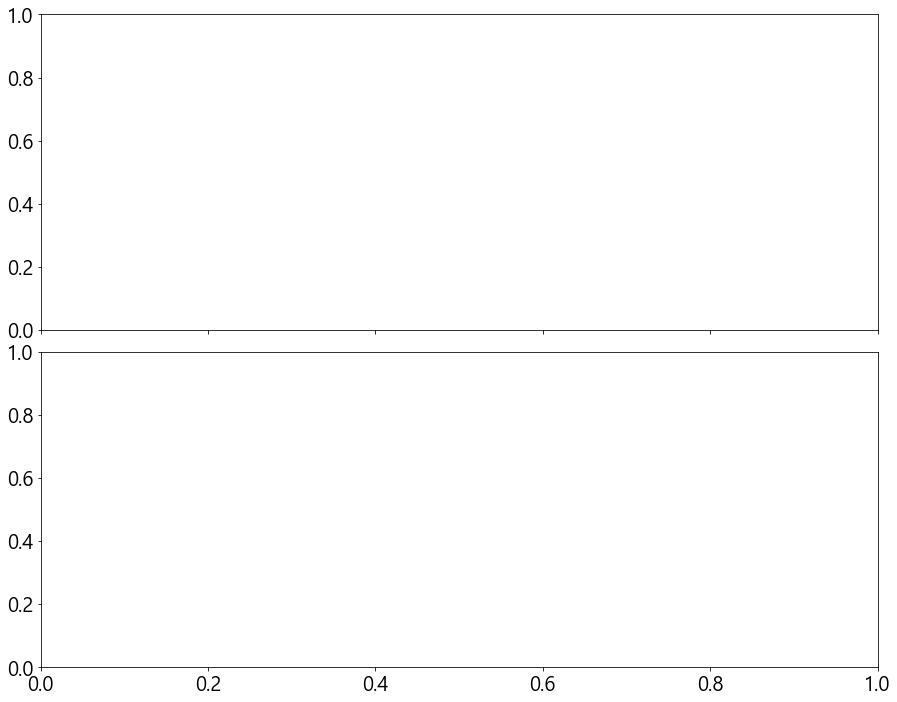

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 12), facecolor='w')
fig.subplots_adjust(hspace = 0.07)
bar_width = 0.2

plt.rc('font', size=20)

index = np.arange(4)


ax1.bar(index-bar_width/2, 창김양진['창원시'], bar_width, alpha=1, color='#0e88ff', 
        label='창원시', edgecolor = 'gray', linewidth = 0.5)
bar1 = ax1.bar(index + bar_width/2, 창김양진['김해시'], bar_width, alpha=0.5, color='red', 
        label='김해시',edgecolor = 'gray', linewidth = 0.5,hatch='/')
ax1.bar(index + 3 * (bar_width/2), 창김양진['양산시'], bar_width, alpha=1, color='#75bbff', 
        label='양산시',edgecolor = 'gray', linewidth = 0.5)
ax1.bar(index + 5 * (bar_width/2), 창김양진['진주시'], bar_width, alpha=1, color='#bce5fe', 
        label='진주시', edgecolor = 'gray', linewidth = 0.5)

ax2.bar(index-bar_width/2, 창김양진['창원시'], bar_width, alpha=1, color='#0e88ff', 
        label='창원시', edgecolor = 'gray', linewidth = 0.5)
ax2.bar(index + bar_width/2, 창김양진['김해시'], bar_width, alpha=0.5, color='red', 
        label='김해시',edgecolor = 'gray', linewidth = 0.5,hatch='/')
ax2.bar(index + 3 * (bar_width/2), 창김양진['양산시'], bar_width, alpha=1, color='#75bbff', 
        label='양산시',edgecolor = 'gray', linewidth = 0.5)
ax2.bar(index + 5 * (bar_width/2), 창김양진['진주시'], bar_width, alpha=1, color='#bce5fe', 
        label='진주시', edgecolor = 'gray', linewidth = 0.5)


# ax3.bar(index-bar_width/2, 창김양진['창원시'], bar_width, alpha=1, color='#0e88ff', 
#         label='창원시', edgecolor = 'gray', linewidth = 0.5)
# ax3.bar(index + bar_width/2, 창김양진['김해시'], bar_width, alpha=0.5, color='red', 
#         label='김해시',edgecolor = 'gray', linewidth = 0.5,hatch='/')
# ax3.bar(index + 3 * (bar_width/2), 창김양진['양산시'], bar_width, alpha=1, color='#75bbff', 
#         label='양산시',edgecolor = 'gray', linewidth = 0.5)
# ax3.bar(index + 5 * (bar_width/2), 창김양진['진주시'], bar_width, alpha=1, color='#bce5fe', 
#         label='진주시', edgecolor = 'gray', linewidth = 0.5)

for rect in bar1:
    height = rect.get_height()
    if height > 100:
        plt.text(rect.get_x() + rect.get_width()/2.0, 160, '%.0f' % height, 
                 ha='center', va='bottom', size = 20,fontweight = 'bold')
    if height < 100 and height > 50:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, 
                 ha='center', va='bottom', size = 20,fontweight = 'bold')
    if height < 50:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, 
                 ha='center', va='bottom', size = 20,fontweight = 'bold')



plt.xticks(np.arange(bar_width, 4 + bar_width, 1), 창김양진.index)


ax1.set_ylim(200, 1300)
ax2.set_ylim(0, 120)


# ax1.grid(alpha=0.7)
# ax2.grid(alpha=0.7)
# ax3.grid(alpha=0.7)

ax1.set_axisbelow(True)
ax1.grid(color='gray', linestyle='dashed')
ax2.set_axisbelow(True)
ax2.grid(color='gray', linestyle='dashed')
ax3.set_axisbelow(True)
ax3.grid(color='gray', linestyle='dashed')



plt.xlabel('등급', labelpad=20, size=20, weight ='bold')
# plt.ylabel('의료기관 수', size = 13)
ax2.set_ylabel('의료기관 수', fontsize=20,labelpad=20, weight ='bold')
# ax1.set_title('타 지역 비교(의료기관 급)',  
#              fontsize=30, pad=20, fontweight = 'bold')


ax1.legend()
plt.show()

In [62]:
창김양진

창원시  김해시  양산시  진주시
의원급      1201  483  353  422
병원급       103   66   35   28
종합병원급       9    5    2    3
상급종합병원급     1    0    1    1
공공보건       18   10    9   26

In [63]:
창김양진.loc['총 의료기관'] = {'창원시' : 1201 + 103+ 9 +1+18, '김해시' : 483+66+5+0+10, 
                               '양산시' : 353+35+2+1+9, '진주시' : 422+28+3+1+26}

In [64]:
창김양진

창원시  김해시  양산시  진주시
의원급      1201  483  353  422
병원급       103   66   35   28
종합병원급       9    5    2    3
상급종합병원급     1    0    1    1
공공보건       18   10    9   26
총 의료기관   1332  564  400  480

In [65]:
창김양진.sort_values('창원시', ascending=False, inplace=True)

In [66]:
창김양진

창원시  김해시  양산시  진주시
총 의료기관   1332  564  400  480
의원급      1201  483  353  422
병원급       103   66   35   28
공공보건       18   10    9   26
종합병원급       9    5    2    3
상급종합병원급     1    0    1    1

In [68]:
창김양진['김해시']['병원급'] = 65
창김양진['김해시']['총 의료기관'] = 563

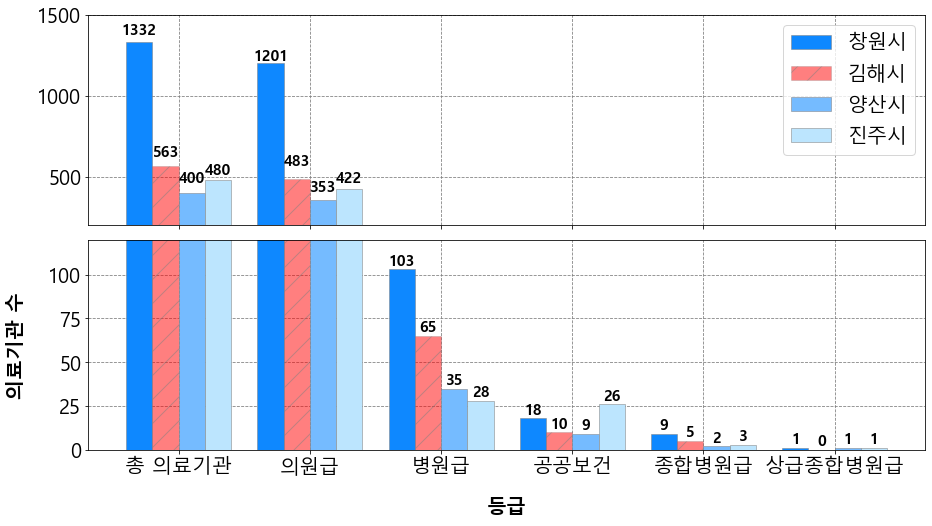

In [69]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 8), facecolor='w')
fig.subplots_adjust(hspace = 0.07)
bar_width = 0.2

plt.rc('font', size=20)

index = np.arange(6)


bar1 = ax1.bar(index-bar_width/2, 창김양진['창원시'], bar_width, alpha=1, color='#0e88ff', 
        label='창원시', edgecolor = 'gray', linewidth = 0.5)
bar2 = ax1.bar(index + bar_width/2, 창김양진['김해시'], bar_width, alpha=0.5, color='red', 
        label='김해시',edgecolor = 'gray', linewidth = 0.5,hatch='/')
bar3 = ax1.bar(index + 3 * (bar_width/2), 창김양진['양산시'], bar_width, alpha=1, color='#75bbff', 
        label='양산시',edgecolor = 'gray', linewidth = 0.5)
bar4 = ax1.bar(index + 5 * (bar_width/2), 창김양진['진주시'], bar_width, alpha=1, color='#bce5fe', 
        label='진주시', edgecolor = 'gray', linewidth = 0.5)

ax2.bar(index-bar_width/2, 창김양진['창원시'], bar_width, alpha=1, color='#0e88ff', 
        label='창원시', edgecolor = 'gray', linewidth = 0.5)
ax2.bar(index + bar_width/2, 창김양진['김해시'], bar_width, alpha=0.5, color='red', 
        label='김해시',edgecolor = 'gray', linewidth = 0.5,hatch='/')
ax2.bar(index + 3 * (bar_width/2), 창김양진['양산시'], bar_width, alpha=1, color='#75bbff', 
        label='양산시',edgecolor = 'gray', linewidth = 0.5)
ax2.bar(index + 5 * (bar_width/2), 창김양진['진주시'], bar_width, alpha=1, color='#bce5fe', 
        label='진주시', edgecolor = 'gray', linewidth = 0.5)


# ax3.bar(index-bar_width/2, 창김양진['창원시'], bar_width, alpha=1, color='#0e88ff', 
#         label='창원시', edgecolor = 'gray', linewidth = 0.5)
# ax3.bar(index + bar_width/2, 창김양진['김해시'], bar_width, alpha=0.5, color='red', 
#         label='김해시',edgecolor = 'gray', linewidth = 0.5,hatch='/')
# ax3.bar(index + 3 * (bar_width/2), 창김양진['양산시'], bar_width, alpha=1, color='#75bbff', 
#         label='양산시',edgecolor = 'gray', linewidth = 0.5)
# ax3.bar(index + 5 * (bar_width/2), 창김양진['진주시'], bar_width, alpha=1, color='#bce5fe', 
#         label='진주시', edgecolor = 'gray', linewidth = 0.5)


f_size = 15


for rect in bar1:
    height = rect.get_height()
    if height > 1300:
        plt.text(rect.get_x() + rect.get_width()/2.0, 235, '%.0f' % height, 
                 ha='center', va='bottom', size = f_size,fontweight = 'bold')
    if height > 500 and height < 1300:
        plt.text(rect.get_x() + rect.get_width()/2.0, 220, '%.0f' % height, 
                 ha='center', va='bottom', size = f_size,fontweight = 'bold')
    if height < 150 and height > 50:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, 
                 ha='center', va='bottom', size = f_size,fontweight = 'bold')
    if height < 50:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, 
                 ha='center', va='bottom', size = f_size,fontweight = 'bold')
for rect in bar2:
    height = rect.get_height()
    if height > 500:
        plt.text(rect.get_x() + rect.get_width()/2.0, 165, '%.0f' % height, 
                 ha='center', va='bottom', size = f_size,fontweight = 'bold')
    if height > 250 and height < 500:
        plt.text(rect.get_x() + rect.get_width()/2.0, 160, '%.0f' % height, 
                 ha='center', va='bottom', size = f_size,fontweight = 'bold')
    if height < 150 and height > 50:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, 
                 ha='center', va='bottom', size = f_size,fontweight = 'bold')
    if height < 50:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, 
                 ha='center', va='bottom', size = f_size,fontweight = 'bold')
        
for rect in bar3:
    height = rect.get_height()
    if height > 360:
        plt.text(rect.get_x() + rect.get_width()/2.0, 150, '%.0f' % height, 
                 ha='center', va='bottom', size = f_size,fontweight = 'bold')
    if height > 250 and height < 360:
        plt.text(rect.get_x() + rect.get_width()/2.0, 145, '%.0f' % height, 
                 ha='center', va='bottom', size = f_size,fontweight = 'bold')
    if height < 150 and height > 50:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, 
                 ha='center', va='bottom', size = f_size,fontweight = 'bold')
    if height < 50:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, 
                 ha='center', va='bottom', size = f_size,fontweight = 'bold')
        
for rect in bar4:
    height = rect.get_height()
    if height > 450:
        plt.text(rect.get_x() + rect.get_width()/2.0, 155, '%.0f' % height, 
                 ha='center', va='bottom', size = f_size,fontweight = 'bold')
    if height > 250 and height < 450:
        plt.text(rect.get_x() + rect.get_width()/2.0, 150, '%.0f' % height, 
                 ha='center', va='bottom', size = f_size,fontweight = 'bold')
    if height < 150 and height > 50:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, 
                 ha='center', va='bottom', size = f_size,fontweight = 'bold')
    if height < 50:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, 
                 ha='center', va='bottom', size = f_size,fontweight = 'bold')
        
        
        
        
        
        
        



plt.xticks(np.arange(bar_width, 6 + bar_width, 1), 창김양진.index)


ax1.set_ylim(200, 1500)
ax2.set_ylim(0, 120)


# ax1.grid(alpha=0.7)
# ax2.grid(alpha=0.7)
# ax3.grid(alpha=0.7)

ax1.set_axisbelow(True)
ax1.grid(color='gray', linestyle='dashed')
ax2.set_axisbelow(True)
ax2.grid(color='gray', linestyle='dashed')
ax3.set_axisbelow(True)
ax3.grid(color='gray', linestyle='dashed')



plt.xlabel('등급', labelpad=20, size=20, weight ='bold')
# plt.ylabel('의료기관 수', size = 13)
ax2.set_ylabel('의료기관 수', fontsize=20,labelpad=20, weight ='bold')
# ax1.set_title('타 지역 비교(의료기관 급)',  
#              fontsize=30, pad=20, fontweight = 'bold')


ax1.legend()
plt.show()